# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Define the genres and file paths
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Mel spectrograms stacked

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths and genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
MEL_SPECTROGRAM_32_PATH = os.path.join('Data', 'mel_spectrograms (3 secs)', 'mel_spectrogram_32')
MEL_SPECTROGRAM_128_PATH = os.path.join('Data', 'mel_spectrograms (3 secs)', 'mel_spectrogram_128')
MEL_SPECTROGRAM_512_PATH = os.path.join('Data', 'mel_spectrograms (3 secs)', 'mel_spectrogram_512')

def extract_song_id(filename):
    return filename.split('_clip_')[0]

def load_and_resize_spectrogram(path, size=(256, 256)):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return tf.image.resize(image, size).numpy()

# First pass: collect song IDs and clip files
song_to_clips = {}
for genre in GENRES:
    genre_dir = os.path.join(MEL_SPECTROGRAM_32_PATH, genre)
    for file in os.listdir(genre_dir):
        song_id = extract_song_id(file)
        if song_id not in song_to_clips:
            song_to_clips[song_id] = {'genre': genre, 'clip_files': []}
        song_to_clips[song_id]['clip_files'].append(file)

# Split song IDs
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

# Second pass: load and process images
def process_clip(genre, clip_file):
    # Load all three versions resized to same dimensions
    img32 = load_and_resize_spectrogram(os.path.join(MEL_SPECTROGRAM_32_PATH, genre, clip_file))
    img128 = load_and_resize_spectrogram(os.path.join(MEL_SPECTROGRAM_128_PATH, genre, clip_file))
    img512 = load_and_resize_spectrogram(os.path.join(MEL_SPECTROGRAM_512_PATH, genre, clip_file))
    
    # Stack along channel axis (now all same size)
    return np.stack([np.squeeze(img32), np.squeeze(img128), np.squeeze(img512)], axis=-1)

# Initialize lists
X_train_mel, X_test_mel = [], []
y_train_mel, y_test_mel = [], []

for song_id in song_ids:
    print(f"Processing {song_id}...")
    genre = song_to_clips[song_id]['genre']
    for clip_file in song_to_clips[song_id]['clip_files']:
        stacked = process_clip(genre, clip_file)
        if song_id in train_ids:
            X_train_mel.append(stacked)
            y_train_mel.append(GENRES.index(genre))
        else:
            X_test_mel.append(stacked)
            y_test_mel.append(GENRES.index(genre))

# Convert to numpy arrays
X_train_mel = np.array(X_train_mel)
X_test_mel = np.array(X_test_mel)
y_train_mel = np.array(y_train_mel)
y_test_mel = np.array(y_test_mel)

print(f"Train shapes - X: {X_train_mel.shape}, y: {y_train_mel.shape}")
print(f"Test shapes - X: {X_test_mel.shape}, y: {y_test_mel.shape}")

Processing blues.00000...
Processing blues.00001...
Processing blues.00002...
Processing blues.00003...
Processing blues.00004...
Processing blues.00005...
Processing blues.00006...
Processing blues.00007...
Processing blues.00008...
Processing blues.00009...
Processing blues.00010...
Processing blues.00011...
Processing blues.00012...
Processing blues.00013...
Processing blues.00014...
Processing blues.00015...
Processing blues.00016...
Processing blues.00017...
Processing blues.00018...
Processing blues.00019...
Processing blues.00020...
Processing blues.00021...
Processing blues.00022...
Processing blues.00023...
Processing blues.00024...
Processing blues.00025...
Processing blues.00026...
Processing blues.00027...
Processing blues.00028...
Processing blues.00029...
Processing blues.00030...
Processing blues.00031...
Processing blues.00032...
Processing blues.00033...
Processing blues.00034...
Processing blues.00035...
Processing blues.00036...
Processing blues.00037...
Processing b

In [5]:
melModel = models.Sequential([    
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])
melModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
melModel.summary()
melModel.fit(X_train_mel, y_train_mel, epochs=25, validation_data=(X_test_mel, y_test_mel), batch_size=32)

c:\Users\ojlon\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,244,554 (100.12 MB)

 Trainable params: 26,244,554 (100.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 218s 864ms/step - accuracy: 0.1524 - loss: 2.2469 - val_accuracy: 0.2815 - val_loss: 1.8944
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 215s 861ms/step - accuracy: 0.3870 - loss: 1.6959 - val_accuracy: 0.4905 - val_loss: 1.4448
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 197s 787ms/step - accuracy: 0.5194 - loss: 1.3578 - val_accuracy: 0.5710 - val_loss: 1.2600
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 206s 824ms/step - accuracy: 0.5916 - loss: 1.1375 - val_accuracy: 0.6155 - val_loss: 1.1509
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 819ms/step - accuracy: 0.6618 - loss: 0.9529 - val_accuracy: 0.6060 - val_loss: 1.1780
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 821ms/step - accuracy: 0.7038 - loss: 0.8297 - val_accuracy: 0.6120 - val_loss: 1.1506
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 204s 816ms/step - accuracy: 0.7305 - loss: 0.7885 - val_accuracy: 0.6465 - val_loss: 1.1260
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 819ms/step - accuracy: 0.7518 -

In [6]:
evaluation = melModel.evaluate(X_test_mel, y_test_mel)
print(f"Test accuracy: {evaluation[1]:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.7290 - loss: 1.3465
Test accuracy: 0.687


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step


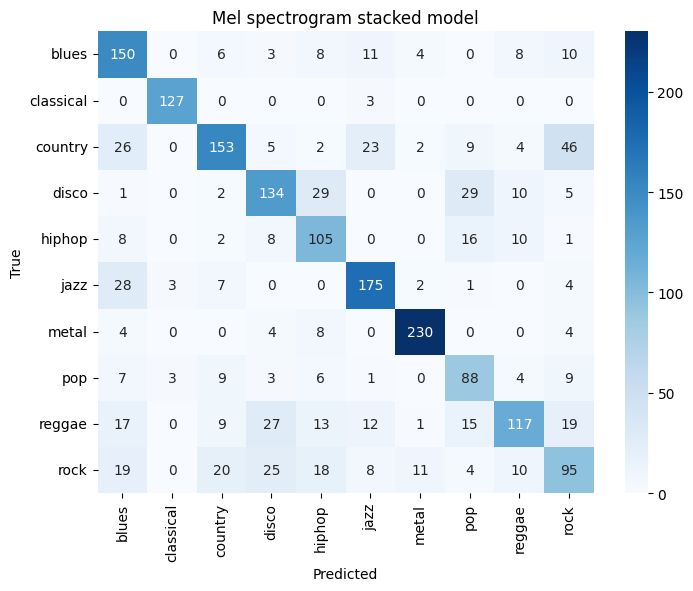

In [7]:
cnn_preds = np.argmax(melModel.predict(X_test_mel), axis=1)
cnn_cm = confusion_matrix(y_test_mel, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("Mel spectrogram stacked model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Chromagrams

In [7]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths and genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
CHROMAGRAM_12_PATH = os.path.join('Data', 'chromagrams', 'chromagram_12')
CHROMAGRAM_24_PATH = os.path.join('Data', 'chromagrams', 'chromagram_24')
CHROMAGRAM_36_PATH = os.path.join('Data', 'chromagrams', 'chromagram_36')

def extract_song_id(filename):
    return filename.split('_clip_')[0]

def load_and_resize_spectrogram(path, size=(36, 72)):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return tf.image.resize(image, size).numpy()

# First pass: collect song IDs and clip files
song_to_clips = {}
for genre in GENRES:
    genre_dir = os.path.join(CHROMAGRAM_12_PATH, genre)
    for file in os.listdir(genre_dir):
        song_id = extract_song_id(file)
        if song_id not in song_to_clips:
            song_to_clips[song_id] = {'genre': genre, 'clip_files': []}
        song_to_clips[song_id]['clip_files'].append(file)

# Split song IDs
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

# Second pass: load and process images
def process_clip(genre, clip_file):
    # Load all three versions resized to same dimensions
    img12 = load_and_resize_spectrogram(os.path.join(CHROMAGRAM_12_PATH, genre, clip_file))
    img24 = load_and_resize_spectrogram(os.path.join(CHROMAGRAM_24_PATH, genre, clip_file))
    img36 = load_and_resize_spectrogram(os.path.join(CHROMAGRAM_36_PATH, genre, clip_file))
    
    # Stack along channel axis (now all same size)
    return np.stack([np.squeeze(img12), np.squeeze(img24), np.squeeze(img36)], axis=-1)

# Initialize lists
X_train_chrom, X_test_chrom = [], []
y_train_chrom, y_test_chrom = [], []

for song_id in song_ids:
    print(f"Processing {song_id}...")
    genre = song_to_clips[song_id]['genre']
    for clip_file in song_to_clips[song_id]['clip_files']:
        stacked = process_clip(genre, clip_file)
        if song_id in train_ids:
            X_train_chrom.append(stacked)
            y_train_chrom.append(GENRES.index(genre))
        else:
            X_test_chrom.append(stacked)
            y_test_chrom.append(GENRES.index(genre))

# Convert to numpy arrays
X_train_chrom = np.array(X_train_chrom)
X_test_chrom = np.array(X_test_chrom)
y_train_chrom = np.array(y_train_chrom)
y_test_chrom = np.array(y_test_chrom)

print(f"Train shapes - X: {X_train_chrom.shape}, y: {y_train_chrom.shape}")
print(f"Test shapes - X: {X_test_chrom.shape}, y: {y_test_chrom.shape}")

Processing blues.00000.png...
Processing blues.00001.png...
Processing blues.00002.png...
Processing blues.00003.png...
Processing blues.00004.png...
Processing blues.00005.png...
Processing blues.00006.png...
Processing blues.00007.png...
Processing blues.00008.png...
Processing blues.00009.png...
Processing blues.00010.png...
Processing blues.00011.png...
Processing blues.00012.png...
Processing blues.00013.png...
Processing blues.00014.png...
Processing blues.00015.png...
Processing blues.00016.png...
Processing blues.00017.png...
Processing blues.00018.png...
Processing blues.00019.png...
Processing blues.00020.png...
Processing blues.00021.png...
Processing blues.00022.png...
Processing blues.00023.png...
Processing blues.00024.png...
Processing blues.00025.png...
Processing blues.00026.png...
Processing blues.00027.png...
Processing blues.00028.png...
Processing blues.00029.png...
Processing blues.00030.png...
Processing blues.00031.png...
Processing blues.00032.png...
Processing

In [8]:
chromModel = models.Sequential([
    layers.Input(shape=(36, 72, 3)),  # (time, pitch-class, channels)
    
    # Chroma-specific convs: focus on pitch-class relationships
    layers.Conv2D(32, (1, 12), activation='relu'),  # Special kernel covering all 12 pitch classes
    layers.BatchNormalization(),
    
    # Time-axis processing
    layers.Conv2D(64, (3, 1), activation='relu'),  # Process temporal patterns
    layers.MaxPooling2D((2, 1)),  # Only pool time dimension
    
    # Combined processing
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.GlobalAveragePooling2D(),  # Better than Flatten for chroma
    
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
chromModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
chromModel.summary()
chromModel.fit(X_train_chrom, y_train_chrom, epochs=30, validation_data=(X_test_chrom, y_test_chrom), batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 36, 61, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 61, 64)     │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,970 (456.91 KB)

 Trainable params: 116,906 (456.66 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.0933 - loss: 4.0026 - val_accuracy: 0.0650 - val_loss: 3.9366
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1538 - loss: 3.8938 - val_accuracy: 0.0650 - val_loss: 3.8634
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1988 - loss: 3.7963 - val_accuracy: 0.0650 - val_loss: 3.7939
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2164 - loss: 3.6879 - val_accuracy: 0.0650 - val_loss: 3.7306
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.2307 - loss: 3.5823 - val_accuracy: 0.0650 - val_loss: 3.6734
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2344 - loss: 3.4766 - val_accuracy: 0.0700 - val_loss: 3.6279
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.2205 - loss: 3.4056 - val_accuracy: 0.0800 - val_loss: 3.5853
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2352 - loss: 3.3317 - val_accuracy: 0.0800 - 

In [9]:
evaluation = chromModel.evaluate(X_test_chrom, y_test_chrom)
print(f"Test accuracy: {evaluation[1]:.3f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3437 - loss: 2.5028
Test accuracy: 0.270


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


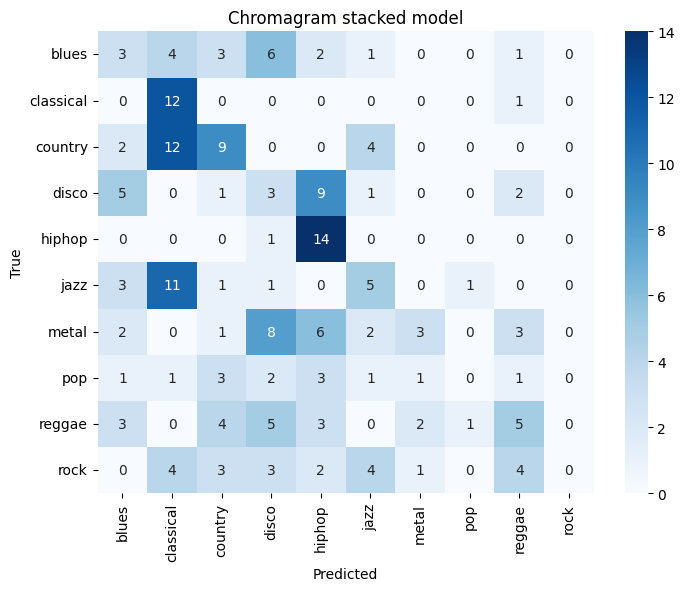

In [10]:
chrom_preds = np.argmax(chromModel.predict(X_test_chrom), axis=1)
chrom_cm = confusion_matrix(y_test_chrom, chrom_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(chrom_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("Chromagram stacked model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Spectrograms

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define paths and genres
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
SPECTROGRAM_256_PATH = os.path.join('Data', 'spectrograms (3 secs)', 'spectrogram_256')
SPECTROGRAM_512_PATH = os.path.join('Data', 'spectrograms (3 secs)', 'spectrogram_512')


def extract_song_id(filename):
    return filename.split('_clip_')[0]

def load_and_resize_spectrogram(path, size=(256,36)):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return tf.image.resize(image, size).numpy()

# First pass: collect song IDs and clip files
song_to_clips = {}
for genre in GENRES:
    genre_dir = os.path.join(SPECTROGRAM_256_PATH, genre)
    for file in os.listdir(genre_dir):
        song_id = extract_song_id(file)
        if song_id not in song_to_clips:
            song_to_clips[song_id] = {'genre': genre, 'clip_files': []}
        song_to_clips[song_id]['clip_files'].append(file)

# Split song IDs
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

# Second pass: load and process images
def process_clip(genre, clip_file):
    # Load both versions resized to same dimensions
    img256 = load_and_resize_spectrogram(os.path.join(SPECTROGRAM_256_PATH, genre, clip_file))
    img512 = load_and_resize_spectrogram(os.path.join(SPECTROGRAM_512_PATH, genre, clip_file))
    
    # Stack along channel axis (now both same size)
    return np.stack([np.squeeze(img256), np.squeeze(img512)], axis=-1)

# Initialize lists
X_train_spect, X_test_spect = [], []
y_train_spect, y_test_spect = [], []

for song_id in song_ids:
    print(f"Processing {song_id}...")
    genre = song_to_clips[song_id]['genre']
    for clip_file in song_to_clips[song_id]['clip_files']:
        stacked = process_clip(genre, clip_file)
        if song_id in train_ids:
            X_train_spect.append(stacked)
            y_train_spect.append(GENRES.index(genre))
        else:
            X_test_spect.append(stacked)
            y_test_spect.append(GENRES.index(genre))

# Convert to numpy arrays
X_train_spect = np.array(X_train_spect)
X_test_spect = np.array(X_test_spect)
y_train_spect = np.array(y_train_spect)
y_test_spect = np.array(y_test_spect)

print(f"Train shapes - X: {X_train_spect.shape}, y: {y_train_spect.shape}")
print(f"Test shapes - X: {X_test_spect.shape}, y: {y_test_spect.shape}")

Processing blues.00000...
Processing blues.00001...
Processing blues.00002...
Processing blues.00003...
Processing blues.00004...
Processing blues.00005...
Processing blues.00006...
Processing blues.00007...
Processing blues.00008...
Processing blues.00009...
Processing blues.00010...
Processing blues.00011...
Processing blues.00012...
Processing blues.00013...
Processing blues.00014...
Processing blues.00015...
Processing blues.00016...
Processing blues.00017...
Processing blues.00018...
Processing blues.00019...
Processing blues.00020...
Processing blues.00021...
Processing blues.00022...
Processing blues.00023...
Processing blues.00024...
Processing blues.00025...
Processing blues.00026...
Processing blues.00027...
Processing blues.00028...
Processing blues.00029...
Processing blues.00030...
Processing blues.00031...
Processing blues.00032...
Processing blues.00033...
Processing blues.00034...
Processing blues.00035...
Processing blues.00036...
Processing blues.00037...
Processing b

In [12]:
spectModel = models.Sequential([
    layers.Input(shape=(256,36, 2)),  # Explicit input layer
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

spectModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
spectModel.summary()
spectModel.fit(X_train_spect, y_train_spect, epochs=20, validation_data=(X_test_spect, y_test_spect), batch_size=32)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 34, 32)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 17, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 15, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 5, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,932,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,191,146 (15.99 MB)

 Trainable params: 4,191,146 (15.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.2334 - loss: 2.0757 - val_accuracy: 0.3275 - val_loss: 1.7096
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.4368 - loss: 1.4924 - val_accuracy: 0.4865 - val_loss: 1.4180
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.5440 - loss: 1.2672 - val_accuracy: 0.4785 - val_loss: 1.4485
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.6007 - loss: 1.1122 - val_accuracy: 0.5520 - val_loss: 1.2953
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6495 - loss: 1.0019 - val_accuracy: 0.5770 - val_loss: 1.2977
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6844 - loss: 0.9040 - val_accuracy: 0.6125 - val_loss: 1.0781
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.7198 - loss: 0.7899 - val_accuracy: 0.6175 - val_loss: 1.1149
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7401 - loss: 0.7105 

In [13]:
evaluation = spectModel.evaluate(X_test_spect, y_test_spect)
print(f"Test accuracy: {evaluation[1]:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7104 - loss: 1.3050
Test accuracy: 0.674


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


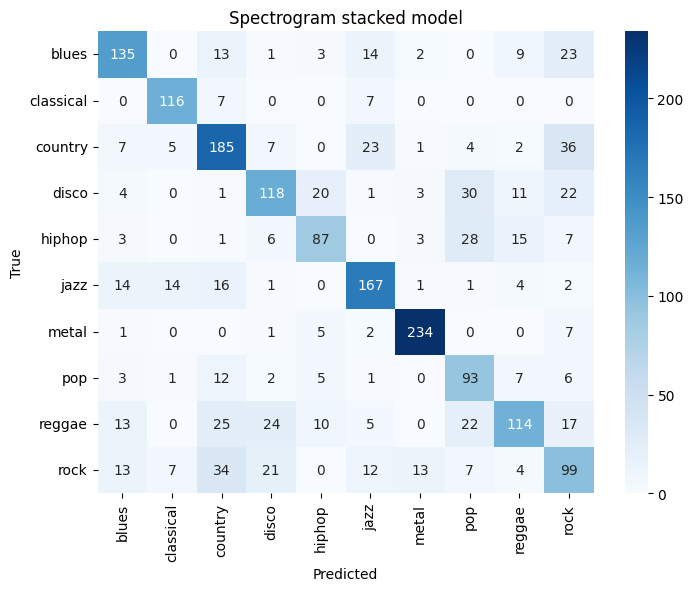

In [14]:
spect_preds = np.argmax(spectModel.predict(X_test_spect), axis=1)
spect_cm = confusion_matrix(y_test_spect, spect_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spect_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("Spectrogram stacked model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()